In [198]:
#Importando as bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
df = pd.read_csv('train.csv')

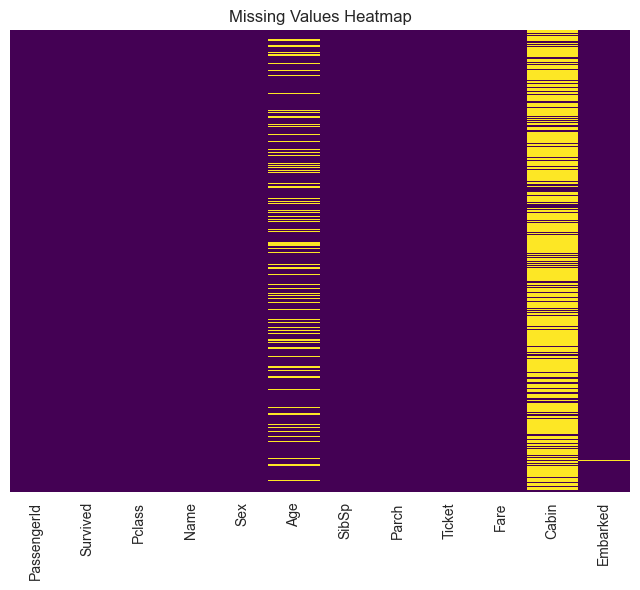

In [187]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [188]:
null_embarked_rows = df[df['Embarked'].isnull()]
print(null_embarked_rows)

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


In [189]:
df = df.dropna()

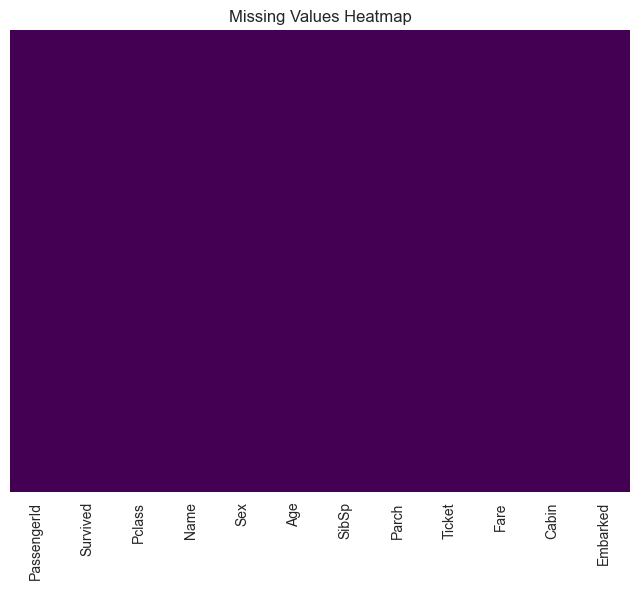

In [190]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [191]:
# Modelo

In [192]:
sex_mapping = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(sex_mapping)

In [193]:
##Matriz de Correlação

In [194]:
#Calcula e retorna X
def logistica(series):
    X = -1.33
    #Sexo
    if(series.iloc[0] == 1):
        X += 2.55
    #2 Classe
    if(series.iloc[1]== 2):
        X += 1.27
    #1 Classe
    if(series.iloc[1] == 1):
        X += 2.58
    X -= (0.04 * series.iloc[2])
    return X

In [195]:
def regressaoLogistica(series):
    exp = np.exp(logistica(series))
    return (exp/(1 + exp))

In [196]:
def returnDf(df):
    data = []
    limite = 0.5
    for i in range(len(df)):
        data.append(regressaoLogistica(df.iloc[i]))
    
    dfRegressao =  pd.DataFrame({'Regressao': data})

    dfRegressao['Regressao'] = (dfRegressao['Regressao'] >= limite).astype(int)
    return dfRegressao

In [197]:
dfTest = pd.read_csv('test.csv')
columns_to_keep = ['Sex', 'Pclass', 'Age']
dfTest = dfTest[columns_to_keep]


median_age = dfTest['Age'].median()
sex_mapping = {'male': 0, 'female': 1}
dfTest['Sex'] = dfTest['Sex'].map(sex_mapping)

dfTest['Survived'] = ''
# Separate the assignment to avoid chained assignment
dfTest['Age'].fillna(median_age)

dfFinal = returnDf(dfTest)
dfSaida = pd.read_csv('test.csv')
dfSaida['Survived'] = dfFinal['Regressao']

csv_file_path = 'test.csv'
dfSaida.to_csv(csv_file_path, index=False)